# 2019 Paper
Problem 1

[[0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]
 [3.44146e+03]
 [-4.91491e+03]
 [0.00000e+00]]
[[-1.73457e-02]
 [-5.20807e-02]
 [1.68768e-02]
 [-1.73457e-02]
 [-4.82533e-03]
 [1.23768e-02]]


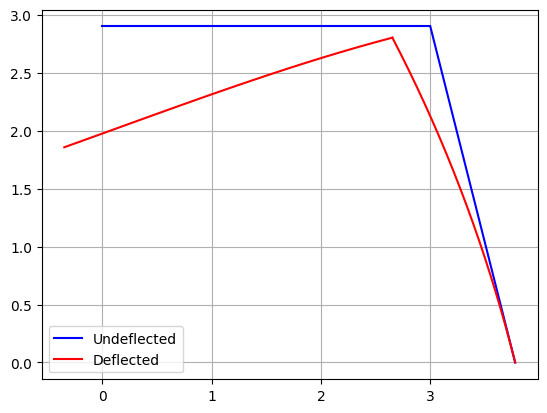

In [25]:
from FEA.FEA import *


I = 1e-5
A = 1e-3
E = 200e9
L = 3
angle_1 = 0
angle_2 = -75

A_1 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_2 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


element1 = Element(A_1, E, I, L, A, angle_1, UDL=(0, -2000, 1, 0), point_load=(L, 35, 6e3, 1, -1))
element2 = Element(A_2, E, I, L, A, angle_2)

Q = np.zeros((6, 1))

structure = Structure([element1, element2], Q)

structure.solve()

print(structure.elements[0].point_load_forces)
print(structure.q)

nodes = np.array([
    [[0, 2.8978], [3, 2.8978]],
    [[3, 2.8978], [3.776, 0]]
])

structure.plot_structure(nodes, 20, 20)

# 2019 Paper
Problem 2

[[2.35440e+04]
 [1.44165e-12]
 [1.04640e+04]
 [0.00000e+00]
 [0.00000e+00]
 [0.00000e+00]]
[[0.00000e+00]
 [-1.20000e+04]
 [-4.00000e+03]
 [0.00000e+00]
 [-1.20000e+04]
 [4.00000e+03]]


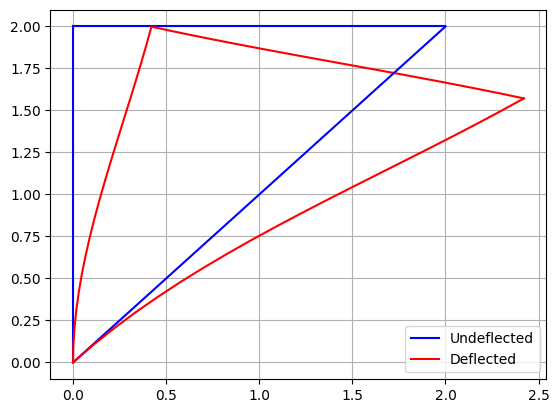

[7.51253e-03]


In [32]:
from FEA.FEA import *


I = 9e-6
A = 8e-4
E = 200e9
L_1 = L_2 = 2
L_3 = 2.83
angle_1 = -90
angle_2 = 0
angle_3 = -135

A_1 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

A_2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


elements = [
    Element(A_1, E, I, L_1, A, angle_1, LVL=(0, 78480, 1, 0)),
    Element(A_2, E, I, L_2, A, angle_2, UDL=(0, -12000, 1, 0)),
    Element(A_3, E, I, L_3, A, angle_3)
]

Q = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0]
])

structure = Structure(elements, Q)

structure.solve()

print(structure.elements[0].LVL_forces)
print(structure.elements[1].UDL_forces)

# reaction_forces = structure.elements[0].global_force[3:6] + structure.elements[2].global_force[3:6] - structure.elements[0].LVL_F_axial[3:6] - structure.elements[0].LVL_F_shear[3:6]
# print(reaction_forces)

# print(structure.elements[0].element_deflections)
# print(structure.elements[0].strain)

nodes = np.array([
    [[0, 2], [0, 0]],
    [[0, 2], [2, 2]],
    [[2, 2], [0, 0]]
])

structure.plot_structure(nodes, 20, 20)

deflection_mid_span = structure.elements[0].calculate_deflections(structure.elements[0].L/2)
print(deflection_mid_span[0])

# 2020 Paper
Problem 1

[[5.58015e+02]
 [-3.12440e+02]
 [-3.69303e+02]
 [2.71859e+03]
 [-1.98187e+03]
 [1.10791e+03]]


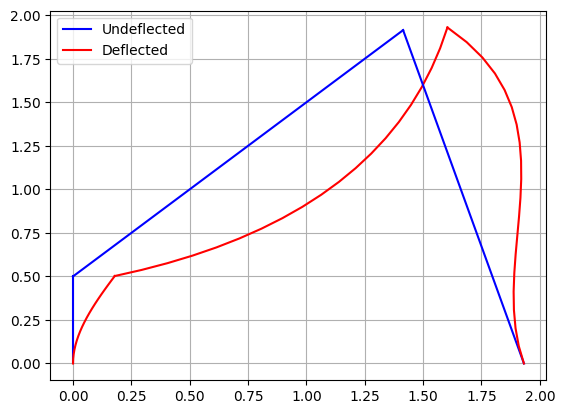

In [30]:
from FEA.FEA import *

I = 1e-6
A = 4e-4
E = 10e9
L_1 = 0.5
L_2 = 2
L_3 = 2
angle_1 = 90
angle_2 = 45
angle_3 = -75

A_1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
])

A_2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
])

A_3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])


elements = [
    Element(A_1, E, I, L_1, A, angle_1),
    Element(A_2, E, I, L_2, A, angle_2, point_load=(1.5, 10, 4e3, 1, -1)),
    Element(A_3, E, I, L_3, A, angle_3)
]

Q = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0]
])

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[1].PL_f_axial)
# print(structure.elements[1].PL_f_shear)

print(structure.external_force_vector)

# print(structure.q)

# reaction forces
# print(structure.elements[0].global_force)
# print(structure.elements[2].global_force)

# print(structure.elements[0].local_force)
# print(structure.elements[0].strain)

# print(structure.elements[2].local_force)
# print(structure.elements[2].strain)

# print(structure.elements[0].element_deflections)

# displacement = structure.elements[0].calculate_deflections(structure.elements[0].L/2)
# print(displacement)


nodes = np.array([
    [[0, 0], [0, 0.5]],
    [[0, 0.5], [1.4142, 1.4142+0.5]],
    [[1.4142, 1.4142+0.5], [1.4142+0.5176, 0]]
])

structure.plot_structure(nodes, 20, 20)

# 2020 Paper
Problem 2

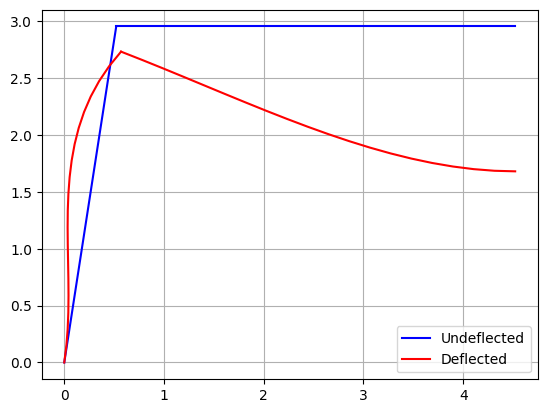

In [5]:
from FEA.FEA import *

A1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
])

A2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
])

E = 30e9
I1 = 6e-6
I2 = 11.6e-6
A = 2e-4

L1 = 3
L2 = 2

angle1 = 80
angle2 = 0

elements = [
    Element(A1, E, I1, L1, A, angle1),
    Element(A2, E, I2, L2, A, angle2, UDL=(0, -10e3, 1, 1))
]

Q = np.zeros((4,1)) 

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[0].global_stiffness)
# print(structure.elements[1].global_stiffness)

# print(structure.elements[1].UDL_f_eq)
# print(structure.external_force_vector)

# print(structure.q)

# reaction forces
# print(structure.elements[0].local_force)
# print(structure.elements[1].local_force - structure.elements[1].UDL_f_eq)

# print(structure.elements[0].global_force[2])

nodes = np.array([
    [[0, 0], [0.521, 2.954]],
    [[0.521, 2.954], [4 + 0.521, 2.954]]
])

structure.plot_structure(nodes, 20, 20)

# 2021 Paper
Problem 1

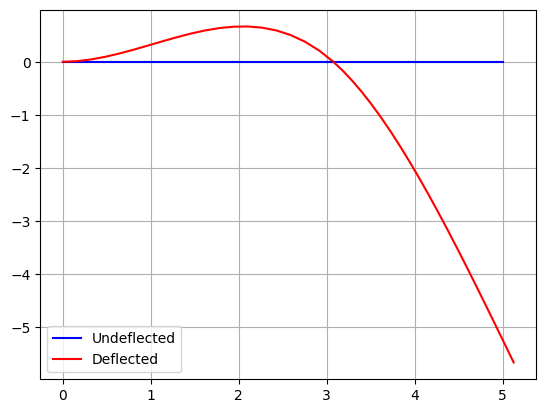

In [7]:
from FEA.FEA import *

A1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])

A2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

E = 200e9
I = 1e-6
A = 1e-4
L1 = 3
L2 = 2
angle1 = 0
angle2 = 0

elements = [
    Element(A1, E, I, L1, A, angle1, UDL=(0, -40e3, 0, 1)),
    Element(A2, E, I, L2, A, angle2)
]

Q = np.array([
    [0],
    [0],
    [25e3],
    [-10e3],
    [0]
])

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[0].global_stiffness)
# print(structure.elements[1].global_stiffness)

# print(structure.external_force_vector)
# print(structure.q)

# print(structure.elements[0].local_force[:3] - structure.elements[0].UDL_f_eq[:3])
# print(structure.elements[0].local_force[3:] - structure.elements[0].UDL_f_eq[3:] + structure.elements[1].local_force[:3])

nodes = np.array([
    [[0, 0], [3, 0]],
    [[3, 0], [5, 0]]
])

structure.plot_structure(nodes, 20, 20)

# 2021 Paper
Problem 2

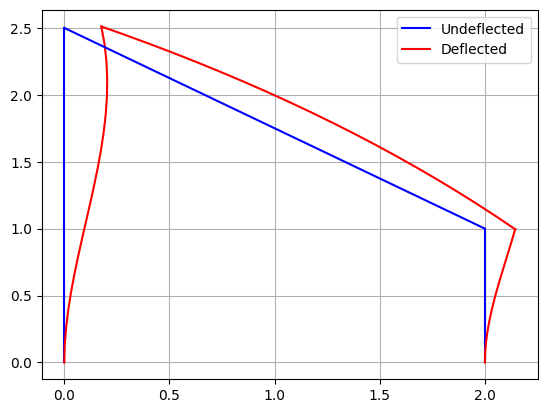

In [9]:
from FEA.FEA import *

A1 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])

A2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

A3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
])

E = 200e9
I = 7.5e-6
A = 9e-4
L1 = 2.5
L2 = 2.5
L3 = 1
angle1 = -90
angle2 = -36.87
angle3 = -90

elements = [
    Element(A1, E, I, L1, A, angle1, LVL=(0, 1000 * 9.81 * 2.5 * 3, 1, 1)),
    Element(A2, E, I, L2, A, angle2),
    Element(A3, E, I, L3, A, angle3)
]

Q = np.zeros((6, 1))

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[0].LVL_f_eq)
# print(structure.external_force_vector)
# print(structure.q)

# print(structure.elements[0].local_force - structure.elements[0].LVL_f_eq)
# print(structure.elements[2].local_force)

# displacement = structure.elements[1].calculate_deflections(structure.elements[1].L/2)
# print(displacement)

nodes = np.array([
    [[0, 2.5], [0, 0]],
    [[0, 2.5], [2, 1]],
    [[2, 1], [2, 0]]
])

structure.plot_structure(nodes, 50, 20)

# 2022 Paper
Problem 1

[[3.64695e-04]
 [-7.79343e-03]]


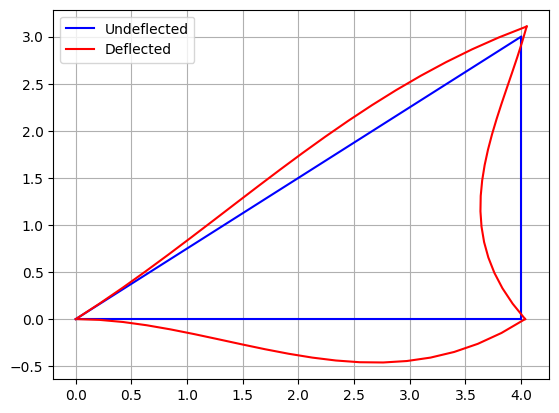

In [13]:
from FEA.FEA import *

A1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])

A2 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

A3 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

E = 200e9
I = 5e-6
A = 2e-4
L1 = 4
L2 = 5
L3 = 3
angle1 = 0
angle2 = 36.87
angle3 = 90

elements = [
    Element(A1, E, I, L1, A, angle1, UDL=(0, -25e3, 1, 1)),
    Element(A2, E, I, L2, A, angle2),
    Element(A3, E, I, L3, A, angle3)
]

Q = np.array([
    [0],
    [0],
    [20e3],
    [40e3],
    [0]
])

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[0].global_stiffness)
# print(structure.elements[1].global_stiffness)
# print(structure.elements[2].global_stiffness)

# print(structure.elements[0].UDL_f_eq)
# print(structure.external_force_vector)
# print(structure.q)

# print(structure.elements[1].global_force[:3] + structure.elements[0].global_force[:3] - structure.elements[0].UDL_F_eq[:3])
# print(structure.elements[0].global_force[3:] + structure.elements[2].global_force[:3] - structure.elements[0].UDL_F_eq[3:])

# print(structure.elements[1].global_force)

displacement = structure.elements[0].calculate_deflections(structure.elements[0].L/2)
print(displacement)

nodes = np.array([
    [[0, 0], [4, 0]],
    [[0, 0], [4, 3]],
    [[4, 0], [4, 3]],
])

structure.plot_structure(nodes, 50, 20)

# 2022 Paper
Problem 1

[[-8.06112e-04]
 [-2.52279e-04]]


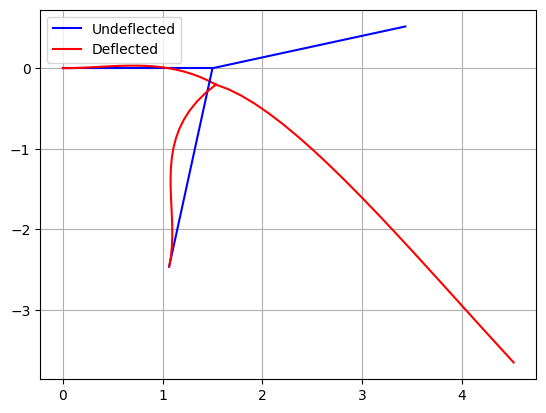

In [15]:
from FEA.FEA import *

A1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])

A2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

A3 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])

E = 200e9
I = 4.5e-6
A = 3e-4
L1 = 1.5
L2 = 2
L3 = 2.5
angle1 = 0
angle2 = 15
angle3 = -100

elements = [
    Element(A1, E, I, L1, A, angle1, UDL=(0, -1e3*5, 1, 1)),
    Element(A2, E, I, L2, A, angle2, UDL=(15, -1e3*5, 1, 1)),
    Element(A3, E, I, L3, A, angle3)
]

Q = np.zeros((6,1))

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[0].global_stiffness)
# print(structure.elements[1].global_stiffness)
# print(structure.elements[2].global_stiffness)

# print(structure.elements[0].UDL_f_shear)
# print(structure.elements[1].UDL_f_shear)
# print(structure.elements[1].UDL_f_axial)
# print(structure.external_force_vector)
# print(structure.q)

# print(structure.elements[0].global_force[:3] - structure.elements[0].UDL_F_shear[:3])
# print(structure.elements[2].global_force[3:])

# print(structure.elements[2].element_deflections)
# print(structure.elements[2].strain)

displacement = structure.elements[2].calculate_deflections(structure.elements[2].L/2)
print(displacement)

nodes = np.array([
    [[0, 0], [1.5, 0]],
    [[1.5, 0], [1.5 + 1.932, 0.518]],
    [[1.5, 0], [1.5 - 0.434, -2.462]],
])

structure.plot_structure(nodes, 250, 20)

# 2017 Paper
Problem 2

[[1.94114e+04]
 [0.00000e+00]
 [0.00000e+00]
 [1.94114e+04]
 [0.00000e+00]
 [0.00000e+00]]
[[-0.00000e+00]
 [-7.24444e+04]
 [-3.62222e+04]
 [-0.00000e+00]
 [-7.24444e+04]
 [3.62222e+04]]


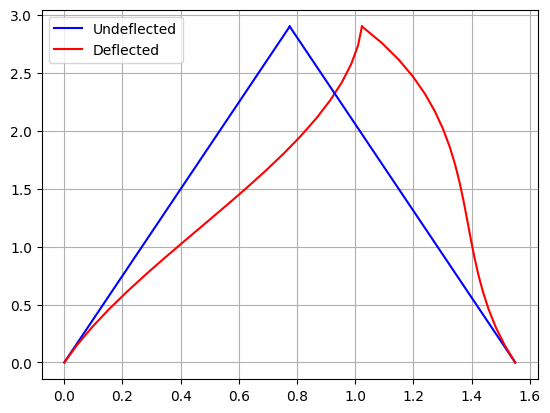

In [29]:
from FEA.FEA import *

Asm1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

Asm2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
])

E = 200e9
I = 4e-6
A = 5e-4
L1 = 3
L2 = 3
angle1 = 75
angle2 = -75

elements = [
    Element(Asm1, E, I, L1, A, angle1, UDL=(15, -50e3, 1, -1)),
    Element(Asm2, E, I, L2, A, angle2)
]

Q = np.zeros((3,1))

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[0].global_stiffness)
# print(structure.elements[1].global_stiffness)
# print(structure.total_stiffness)

print(structure.elements[0].UDL_f_axial)
print(structure.elements[0].UDL_f_shear)
# print(structure.elements[0].UDL_forces)

# print(structure.q)

# print(structure.elements[0].global_force - structure.elements[0].UDL_F_axial - structure.elements[0].UDL_F_shear)
# print(structure.elements[1].global_force)

# displacement = structure.elements[0].calculate_deflections(structure.elements[2].L/2)
# print(displacement)

nodes = np.array([
    [[0, 0], [0.775, 2.898]],
    [[0.775, 2.898],[1.55, 0]]
])

structure.plot_structure(nodes, 20, 20)

# 2018 Paper
Problem 1

[[5.54054e+04]
 [-5.67531e+03]
 [-1.01430e+04]
 [-5.54054e+04]
 [5.67531e+03]
 [-1.82335e+04]]
[-4.61712e-04]


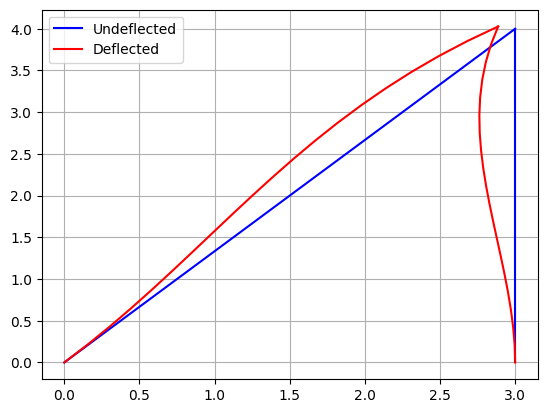

In [5]:
from FEA.FEA import *

Asm1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

Asm2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
])

E = 200e9
I = 8e-6
A = 6e-4
L1 = 5
L2 = 4
angle1 = 53.1
angle2 = -90

elements = [
    Element(Asm1, E, I, L1, A, angle1),
    Element(Asm2, E, I, L2, A, angle2, LVL=(0, -1000*9.81*2*4, 1, 0))
]

Q = np.zeros((3,1))

structure = Structure(elements, Q)

structure.solve()

# print(structure.elements[0].global_stiffness)
# print(structure.elements[1].global_stiffness)
# print(structure.total_stiffness)

# print(structure.elements[1].LVL_f_shear+structure.elements[1].LVL_f_axial)
# print(structure.external_force_vector)

# print(structure.q)

# print(structure.elements[0].global_force)
# print(structure.elements[1].local_force - structure.elements[1].LVL_f_shear - structure.elements[1].LVL_f_axial)

print(structure.elements[0].local_force)
print(structure.elements[0].strain)

nodes = np.array([
    [[0, 0], [3, 4]],
    [[3, 4],[3, 0]]
])
    
displ_mag = 20
res = 20

structure.plot_structure(nodes, displ_mag, res)

# 2018 Paper
Problem 2

[[3.53549e+04]
 [-1.12364e+04]
 [-2.44889e+04]
 [-3.53549e+04]
 [1.12364e+04]
 [-3.16931e+04]]
[[3.53549e+04]
 [1.12364e+04]
 [3.16931e+04]
 [-3.53549e+04]
 [-1.12364e+04]
 [2.44889e+04]]


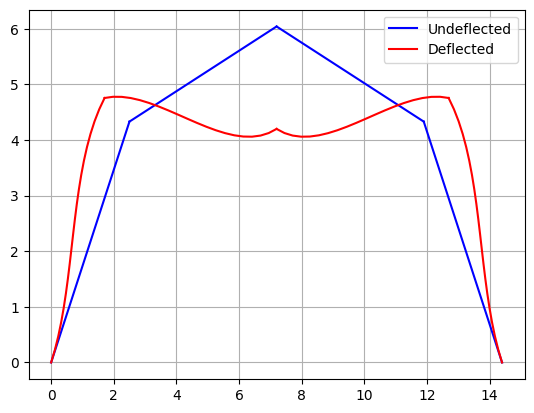

In [1]:
from FEA.FEA import *

Asm1 = np.array([
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])

Asm2 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])

Asm3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
])

Asm4 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
])

E = 200e9
I = 8e-6
A = 6e-4
L1 = 5
L2 = 5
L3 = 5
L4 = 5
angle1 = 60
angle2 = 20
angle3 = -20
angle4 = -60

elements = [
    Element(Asm1, E, I, L1, A, angle1),
    Element(Asm2, E, I, L2, A, angle2),
    Element(Asm3, E, I, L3, A, angle3),
    Element(Asm4, E, I, L4, A, angle4),
]

Q = np.zeros((9,1))

Q[4] = -50e3

structure = Structure(elements, Q)

structure.solve()

# print(structure.q)

# print(structure.elements[0].local_force)
# print(structure.elements[3].local_force)

# print(structure.elements[0].local_force)

nodes = np.array([
    [[0, 0], [2.5, 4.33]],
    [[2.5, 4.33],[2.5 + 4.698, 4.33 + 1.71]],
    [[2.5 + 4.698, 4.33 + 1.71],[2.5 + 2 * 4.698, 4.33]],
    [[2.5 + 2 * 4.698, 4.33],[2 * 2.5 + 2 * 4.698, 0]],
])
    
displ_mag = 20
res = 20

structure.plot_structure(nodes, displ_mag, res)